## <center> Projet OFDMA </center>
### <center> Shiying SHENG, Yuefu ZHOU </center>

**1\.**. Quel est le nombre moyen d’utilisateurs actifs à chaque slot dans la cellule ? <br>
**Réponse:** <br>
\begin{equation}
    p\lambda\pi R^2.
\end{equation}
<br>
**2\.** Calculer $N_{max}$. <br>
**Réponse:** <br>
\begin{equation}
    N_{max} = \left\lceil \frac{C}{W\log_2\left(1+\frac{K}{R^\gamma}\right)}\right\rceil.
\end{equation}
<br>
**3\.** La nature de l'ensemble $A_k$. <br>
**Réponse:** <br>
C'est l'anneaxu $A(R_{k,min},\,R_{k,max})$, où 
\begin{equation}
    R_{k,min}=
    \begin{cases}
        0& k=1\\
        R_{k-1,max}& k\geq 2.
    \end{cases}
\end{equation}
\begin{equation}
    R_{k,max}=\min\left(\left(\frac{K}{2^{\frac{C}{kW}}-1}\right)^{1/\gamma},\,R\right)
\end{equation}
<br>
**4\.** Montrer que l'on peut écrire <br>
\begin{equation}
    F(\phi) = \sum_{k=1}^{N_{max}} k\zeta_k
\end{equation}
où les $\zeta_k$ sont des variables aléatoires indépendantes de loi de Poisson de paramètre $\eta_k$, que l'on calculera. <br>
**Réponse:** <br>
\begin{align*}
    F(\phi) =\,& \sum_{k=1}^{N_{max}} F(A_k) \\
            =\,& \sum_{k=1}^{N_{max}} \sum_{x\in A_k} N(x) \\
            =\,& \sum_{k=1}^{N_{max}} k\zeta_k,
\end{align*}
où $\zeta_k$ est le nombre d'utilisateurs dans $A_k$ suivant la loi de poissons, dont le parametre
\begin{align*}
    \eta_k =\,& \int_{0}^{2\pi} \int_{R_{k,min}}^{R_{k,max}} p\lambda r dr d \theta \\
           =\,& p\lambda\pi \left( R_{k,max}^2 - R_{k,min}^2 \right).
\end{align*}

**5\.** Créer les vecteurs correspondants aux lois des variables aléatoires $\zeta_k$. <br>
**Réponse:** <br>
Si les $\eta_k$ supérieur à $1$ pour tous les $k$, on tronque pour $\zeta_k$ jusqu'à $3\eta_k$. 
Donc on représente pour $\zeta_k$ par le vecteur $\mathit{v}_k$, où
\begin{equation}
    \mathit{v}_{k,i} = e^{-\eta_k}\frac{\eta_k^{i}}{i!}.
\end{equation}
Sinon, on cherche par énumération afin de trouver un seuil $\delta$ tel que $\mathbb{P}\left(\zeta_k > \delta \right) < 10^{-4}$.
<br>

In [1]:
def RBound(k, C=200, W=250, K=1e6,gamma=2.8):    
    return (K/(2**(C/(k*W))-1))**(1/gamma)

def Eta(RDown, RUp, lam=0.01, p=0.01):
    import math
    return p*lam*math.pi*(RUp**2-RDown**2)

def PoissonTruncate(param):
    import math
    ps = []
    if param >= 1:
        for k in range(math.ceil(3*param)):
            ps.append(math.e**(-param)*(param**k/math.factorial(k)))
    else:
        k = 0
        while sum(ps) <= 1-1e-4:
            p = math.e**(-param)*(param**k/math.factorial(k))
            ps.append(p)
            k += 1
    return ps

def KZeta_k(v, k):
    import numpy as np
    length = len(v) - 1
    w = np.zeros(length*k+1)
    j = 0
    for i in range(length*k+1):
        if i % k == 0:
            w[i] = v[j]
            j += 1
    return w

In [2]:
C = 200
W = 250
K = 1e6
gamma = 2.8
R = 300
lam = 0.01
SNRMin = 0.1
p = 0.01
RCurrent = 0
slot = 1
As = []
vs = []
ws = []
while RCurrent <= R:
    RUp = RBound(k=slot)
    eta = Eta(RDown=RCurrent, RUp=min(RUp, R))
    As.append([slot, RCurrent, min(RUp, R), eta])
    RCurrent = RUp
    slot += 1
for A in As:
    eta = A[-1]
    k = int(A[0])
    v = PoissonTruncate(eta)
    vs.append(v)
    ws.append(KZeta_k(v, k))

Pour les $\eta_k$:

In [3]:
for A in As:
    print("%d sous-porteuse Anneau(%.3f, %.3f) de paramètre %.3f" % (A[0], A[1], A[2], A[3]))
    print()

1 sous-porteuse Anneau(0.000, 154.643) de paramètre 7.513

2 sous-porteuse Anneau(154.643, 208.847) de paramètre 6.190

3 sous-porteuse Anneau(208.847, 245.562) de paramètre 5.241

4 sous-porteuse Anneau(245.562, 274.449) de paramètre 4.719

5 sous-porteuse Anneau(274.449, 298.722) de paramètre 4.371

6 sous-porteuse Anneau(298.722, 300.000) de paramètre 0.240



Pour les vecteur représentant $\zeta_k$:

In [4]:
for v in vs:
    print("Le vecteur représentant pour zeta_%d" % (vs.index(v)+1))
    for k in range(len(v)):
        print("Nombre d'utilisateur = %d a pour probabilité %.5f" % (k, v[k]))
    print()

Le vecteur représentant pour zeta_1
Nombre d'utilisateur = 0 a pour probabilité 0.00055
Nombre d'utilisateur = 1 a pour probabilité 0.00410
Nombre d'utilisateur = 2 a pour probabilité 0.01541
Nombre d'utilisateur = 3 a pour probabilité 0.03859
Nombre d'utilisateur = 4 a pour probabilité 0.07248
Nombre d'utilisateur = 5 a pour probabilité 0.10890
Nombre d'utilisateur = 6 a pour probabilité 0.13636
Nombre d'utilisateur = 7 a pour probabilité 0.14636
Nombre d'utilisateur = 8 a pour probabilité 0.13745
Nombre d'utilisateur = 9 a pour probabilité 0.11474
Nombre d'utilisateur = 10 a pour probabilité 0.08620
Nombre d'utilisateur = 11 a pour probabilité 0.05887
Nombre d'utilisateur = 12 a pour probabilité 0.03686
Nombre d'utilisateur = 13 a pour probabilité 0.02130
Nombre d'utilisateur = 14 a pour probabilité 0.01143
Nombre d'utilisateur = 15 a pour probabilité 0.00573
Nombre d'utilisateur = 16 a pour probabilité 0.00269
Nombre d'utilisateur = 17 a pour probabilité 0.00119
Nombre d'utilisateur

**6\.** Construire les vecteurs représentant les lois des vecteurs $k\zeta_k$. <br>
**Réponse:** <br>
\begin{align*}
    \mathbb{P}\left( k\zeta_k = l\right) =\,& \mathbb{P}\left( \zeta_k = \frac{l}{k}\right) \\
                                         =\,& \begin{cases}
                                                   e^{-\eta_k}\frac{\eta_k^{m}}{m!}& l=m\cdot k,\,m\in \mathbb{N}
                                                                                                    \bigcap \left[1,\,3\eta_k\right] \\
                                                   0& sinon.
                                              \end{cases}
\end{align*}
Donc on construit pour $k\zeta_k$ le vecteur $\mathit{w}_k$, où
\begin{align*}
    \mathit{w}_{k,i} = \mathbb{P}\left( k\zeta_k = i\right).
\end{align*}
<br>

In [5]:
for w in ws:
    print("Le vecteur représentant pour %dzeta_%d" % ((ws.index(w)+1), (ws.index(w))+1))
    for k in range(len(w)):
        print("Nombre de sous-porteuses = %d a pour probabilité %.5f" % (k, w[k]))
    print()

Le vecteur représentant pour 1zeta_1
Nombre de sous-porteuses = 0 a pour probabilité 0.00055
Nombre de sous-porteuses = 1 a pour probabilité 0.00410
Nombre de sous-porteuses = 2 a pour probabilité 0.01541
Nombre de sous-porteuses = 3 a pour probabilité 0.03859
Nombre de sous-porteuses = 4 a pour probabilité 0.07248
Nombre de sous-porteuses = 5 a pour probabilité 0.10890
Nombre de sous-porteuses = 6 a pour probabilité 0.13636
Nombre de sous-porteuses = 7 a pour probabilité 0.14636
Nombre de sous-porteuses = 8 a pour probabilité 0.13745
Nombre de sous-porteuses = 9 a pour probabilité 0.11474
Nombre de sous-porteuses = 10 a pour probabilité 0.08620
Nombre de sous-porteuses = 11 a pour probabilité 0.05887
Nombre de sous-porteuses = 12 a pour probabilité 0.03686
Nombre de sous-porteuses = 13 a pour probabilité 0.02130
Nombre de sous-porteuses = 14 a pour probabilité 0.01143
Nombre de sous-porteuses = 15 a pour probabilité 0.00573
Nombre de sous-porteuses = 16 a pour probabilité 0.00269
Nomb

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  


**7\.** Calculer le vecteur représentant la loi de $F$. <br>
**Réponse:** <br>
\begin{align*}
    \mathbb{P}\left(F = f\right) =\,& \sum_{\sum f_k=f} \prod_{k=1}^{N_{max}}\mathit{P}\left( k\zeta_k=f_k\right) \\
                                 =\,& \sum_{f_1+f_{-1}=f} \mathit{P}\left(\zeta_1=f_1\right) 
                                      \sum_{f_{2}+f_{-2}=f_{-1}} \mathit{P}\left(2\zeta_2=f_2\right) 
                                      \sum ...
                                      \sum_{f_{N_{max}-1}+f_{N_{max}}=f_{-(N_{max}-2)}} 
                                          \mathit{P}\left(\left(N_{max}-1\right)\zeta_{N_{max}-1}=f_{N_{max}-1}\right) 
                                          \mathit{P}\left(N_{max}\zeta_{N_{max}}=f_{N_{max}}\right) \\
                                 =\,& \mathit{w}_1 * \left( \mathit{w}_2 * ...\mathit{w}_{N_{max}-2} * 
                                      \left(\mathit{w}_{N_{max}-1} * \mathit{w}_{N_{max}} \left[f_{-(N_{max}-2)} \right] \right)
                                      \left[f_{-(N_{max}-3)} \right]...\right) \left[f \right],
\end{align*}
où $f_{-x}=f-\sum_{k=1}^x f_k$.
<br>

In [6]:
import matplotlib.pyplot as plt
import numpy as np
conv = np.array([1])
for w in ws:
    conv = np.convolve(w,conv)

plt.title('Distribution de F')
plt.ylabel('Probabilité')
plt.xlabel('F')
plt.plot(np.linspace(0,len(conv)-1,len(conv)), conv, '.')

print("Le vecteur représentant F")
print(conv)

Le vecteur représentant F
[5.25548518e-13 3.94840448e-12 1.80850498e-11 6.43382202e-11
 1.94814421e-10 5.26097957e-10 1.30072171e-09 2.99482096e-09
 6.49801608e-09 1.34030415e-08 2.64560605e-08 5.02343221e-08
 9.21379501e-08 1.63802276e-07 2.83059089e-07 4.76595443e-07
 7.83476567e-07 1.25971304e-06 1.98405647e-06 3.06520260e-06
 4.65056089e-06 6.93671435e-06 1.01816393e-05 1.47186810e-05
 2.09721873e-05 2.94745921e-05 4.08846118e-05 5.60060806e-05
 7.58068061e-05 1.01436686e-04 1.34244196e-04 1.75790245e-04
 2.27858326e-04 2.92459827e-04 3.71833392e-04 4.68437274e-04
 5.84933729e-04 7.24164697e-04 8.89118220e-04 1.08288537e-03
 1.30860778e-03 1.56941614e-03 1.86836070e-03 2.20833474e-03
 2.59199282e-03 3.02166567e-03 3.49927392e-03 4.02624324e-03
 4.60342344e-03 5.23101414e-03 5.90849983e-03 6.63459660e-03
 7.40721303e-03 8.22342690e-03 9.07947951e-03 9.97078846e-03
 1.08919795e-02 1.18369373e-02 1.27988746e-02 1.37704185e-02
 1.47437122e-02 1.57105300e-02 1.66624027e-02 1.75907511e-0

**8\.** Trouver S tel que $p_0 < 0,01$. <br>
**Réponse:** <br>
\begin{equation}
    S^* = \min \lbrace S; \sum_{f=1}^S \mathbb{P}\left(F=f \right) > 0.99 \rbrace.
\end{equation}

Le seuil pour que la proba d'outage soit inférieure à 0.01 vaut 119.


Text(124,0,'S=119')

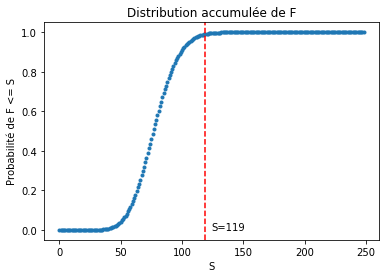

In [7]:
FAcc = np.add.accumulate(conv)
S = 0
f = FAcc[S]
while f <= 0.99:
    S += 1
    f = FAcc[S]
print("Le seuil pour que la proba d'outage soit inférieure à 0.01 vaut %d." % S)
    
plt.title('Distribution accumulée de F')
plt.ylabel('Probabilité de F <= S')
plt.xlabel('S')
plt.plot(np.linspace(0,len(FAcc)-1,len(FAcc)), FAcc, '.')
plt.axvline(S, 0, 1, linestyle= '--', color='r')
plt.annotate('S=' + str(S), xy=(S+5, 0))